In [ ]:
import numpy as np 
import pandas as pd 
import re 
import nltk 
import matplotlib.pyplot as plt
import string 
import matplotlib

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df = pd.read_csv("Shark Tank.csv")
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [ ]:
df.shape

(495, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   deal                    495 non-null    bool  
 1   description             495 non-null    object
 2   episode                 495 non-null    int64 
 3   category                495 non-null    object
 4   entrepreneurs           423 non-null    object
 5   location                495 non-null    object
 6   website                 457 non-null    object
 7   askedFor                495 non-null    int64 
 8   exchangeForStake        495 non-null    int64 
 9   valuation               495 non-null    int64 
 10  season                  495 non-null    int64 
 11  shark1                  495 non-null    object
 12  shark2                  495 non-null    object
 13  shark3                  495 non-null    object
 14  shark4                  495 non-null    object
 15  shark5

In [ ]:
df.isnull() .sum()

deal                       0
description                0
episode                    0
category                   0
entrepreneurs             72
location                   0
website                   38
askedFor                   0
exchangeForStake           0
valuation                  0
season                     0
shark1                     0
shark2                     0
shark3                     0
shark4                     0
shark5                     0
title                      0
episode-season             0
Multiple Entreprenuers     0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

deal                      0
description               0
episode                   0
category                  0
entrepreneurs             0
location                  0
website                   0
askedFor                  0
exchangeForStake          0
valuation                 0
season                    0
shark1                    0
shark2                    0
shark3                    0
shark4                    0
shark5                    0
title                     0
episode-season            0
Multiple Entreprenuers    0
dtype: int64

1. Pick out the Deal (Dependent Variable) and Description columns into a separate data frame.

In [ ]:
DV = df[["deal","description"]]
display(DV)

,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
5,True,One of the first entrepreneurs to pitch on Sha...
...,...,...
490,True,Zoom Interiors is a virtual service for interi...
491,True,Spikeball started out as a casual outdoors gam...
492,True,Shark Wheel is out to literally reinvent the w...
493,False,Adriana Montano wants to open the first Cat Ca...


2. Create two corpora, one with those who secured a Deal, the other with those who did not secure
a deal.

In [ ]:
DV["deal"]=DV["deal"].astype("str")
df_true = pd.DataFrame()
df_false = pd.DataFrame()
grouped=DV.groupby(DV.deal)

<ipython-input-127-106dfb2edad7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DV["deal"]=DV["deal"].astype("str")


In [ ]:
grouped.head()
df_true=grouped.get_group("True")
df_false=grouped.get_group("False")

In [ ]:
DV.head()

,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
5,True,One of the first entrepreneurs to pitch on Sha...


In [ ]:
df_true.info()
df_true.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         204 non-null    object
 1   description  204 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


,deal,description
count,204,204
unique,1,203
top,True,"Echo Valley Meats is a retail, online gift cat..."
freq,204,2


In [ ]:
df_false.info()
df_false.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 3 to 493
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         183 non-null    object
 1   description  183 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB


,deal,description
count,183,183
unique,1,182
top,False,Premium wine sold by the glass in individually...
freq,183,2


3. The following exercise is to be done for both the corpora:
a) Find the number of characters for both the corpuses.

In [ ]:
df_true["chars"]=df_true["description"].str.len()
df_false["chars"]=df_false["description"].str.len()
sum_true=df_true["chars"].sum()
sum_false=df_false["chars"].sum()
print("True Corpus",sum_true)
print("False Corpus",sum_false)

True Corpus 50302
False Corpus 34899


<ipython-input-132-70b90a94d6e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true["chars"]=df_true["description"].str.len()
<ipython-input-132-70b90a94d6e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_false["chars"]=df_false["description"].str.len()


In [ ]:
df_true.drop(["deal"],axis=1,inplace=True)
df_true

<ipython-input-133-935ae9ff3d2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true.drop(["deal"],axis=1,inplace=True)


,description,chars
1,Retail and wholesale pie factory with two reta...,73
2,Ava the Elephant is a godsend for frazzled par...,244
5,One of the first entrepreneurs to pitch on Sha...,365
12,A line of books written to help children find ...,57
16,Coverplay is a slipcover for children's play y...,722
...,...,...
489,SynDaver Labs makes synthetic body parts for u...,442
490,Zoom Interiors is a virtual service for interi...,328
491,Spikeball started out as a casual outdoors gam...,504
492,Shark Wheel is out to literally reinvent the w...,502


In [ ]:
df_false.drop(["deal"],axis=1,inplace=True)
df_false

<ipython-input-134-21e57d07134d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_false.drop(["deal"],axis=1,inplace=True)


,description,chars
3,"Organizing, packing, and moving services deliv...",68
4,Interactive media centers for healthcare waiti...,112
6,A mixed martial arts clothing line looking to ...,110
7,"Attach Noted is a detachable ""arm"" that holds ...",91
8,A safety device for seatbelts. It prevents the...,111
...,...,...
482,Buck Mason makes high-quality men's clothing i...,56
484,"Frameri answers the question, ""Why aren't your...",397
485,The Paleo Diet Bar is a nutrition bar that is ...,258
488,Sunscreen Mist adds another point of access fo...,423


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df_true=df_true.astype("str")
df_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  204 non-null    object
 1   chars        204 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


b) Remove Stop Words from the corpora. (Words like ‘also’, ‘made’, ‘makes’, ‘like’, ‘this’,
‘even’ and ‘company’ are to be removed bold text)

In [ ]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df['description'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words.extend(['also', 'made', 'makes', 'like', 'this', 'even','company'])
print(len(stop_words))

186


In [ ]:
df['description'] = df['description'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
df

<ipython-input-141-63c23836c613>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df['description'].str.replace('[^\w\s]','')


,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
1,True,Retail wholesale pie factory two retail locati...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava Elephant godsend frazzled parents young ch...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,Organizing packing moving services delivered c...,1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers healthcare waiting r...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False
5,True,One first entrepreneurs pitch Shark Tank Susan...,2,Specialty Food,Susan Knapp,"Napa Valley, CA",http://www.aperfectpear.com,500000,15,3333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,1-2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,True,Zoom Interiors virtual service interior design...,28,Online Services,"Beatrice Fischel-Bock, Madeine Fraser & Lizzie...","Philadelphia, PA",https://zoominteriors.com,100000,20,500000,6,Lori Greiner,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Mark Cuban,Zoom Interiors,6-28,False
491,True,Spikeball started casual outdoors game grown b...,29,Toys and Games,Chris Ruder,"Chicago, IL",http://spikeball.com,500000,10,5000000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Spikeball,6-29,False
492,True,Shark Wheel literally reinvent wheel Their inn...,29,Outdoor Recreation,David Patrick and Zack Fleishman,"Lake Forest, CA",http://www.sharkwheel.com,100000,5,2000000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Shark Wheel,6-29,True
493,False,Adriana Montano wants open first Cat Cafe Flor...,29,Entertainment,Adriana Montano,"Boca Raton, FL",http://gatocafeflorida.com,100000,20,500000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Gato Cafe,6-29,False


In [ ]:
## Converting all the words to lower case

df['description'] = df['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
1,True,retail wholesale pie factory two retail locati...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,ava elephant godsend frazzled parents young ch...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,organizing packing moving services delivered c...,1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,interactive media centers healthcare waiting r...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False
5,True,one first entrepreneurs pitch shark tank susan...,2,Specialty Food,Susan Knapp,"Napa Valley, CA",http://www.aperfectpear.com,500000,15,3333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,1-2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,True,zoom interiors virtual service interior design...,28,Online Services,"Beatrice Fischel-Bock, Madeine Fraser & Lizzie...","Philadelphia, PA",https://zoominteriors.com,100000,20,500000,6,Lori Greiner,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Mark Cuban,Zoom Interiors,6-28,False
491,True,spikeball started casual outdoors game grown b...,29,Toys and Games,Chris Ruder,"Chicago, IL",http://spikeball.com,500000,10,5000000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Spikeball,6-29,False
492,True,shark wheel literally reinvent wheel their inn...,29,Outdoor Recreation,David Patrick and Zack Fleishman,"Lake Forest, CA",http://www.sharkwheel.com,100000,5,2000000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Shark Wheel,6-29,True
493,False,adriana montano wants open first cat cafe flor...,29,Entertainment,Adriana Montano,"Boca Raton, FL",http://gatocafeflorida.com,100000,20,500000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Gato Cafe,6-29,False


In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['description'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['description','stopwords']].head()

,description,stopwords
1,retail wholesale pie factory two retail locati...,0
2,ava elephant godsend frazzled parents young ch...,1
3,organizing packing moving services delivered c...,0
4,interactive media centers healthcare waiting r...,0
5,one first entrepreneurs pitch shark tank susan...,1


In [ ]:
df['hastags'] = df['description'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['description','hastags']].head()

,description,hastags
1,retail wholesale pie factory two retail locati...,0
2,ava elephant godsend frazzled parents young ch...,0
3,organizing packing moving services delivered c...,0
4,interactive media centers healthcare waiting r...,0
5,one first entrepreneurs pitch shark tank susan...,0


In [ ]:
df['numerics'] = df['description'].apply(lambda x: len(re.findall(r'[0-9]',x)))
df[['description','numerics']].head()

,description,numerics
1,retail wholesale pie factory two retail locati...,0
2,ava elephant godsend frazzled parents young ch...,0
3,organizing packing moving services delivered c...,0
4,interactive media centers healthcare waiting r...,0
5,one first entrepreneurs pitch shark tank susan...,3


In [ ]:
#Lower case

In [ ]:
df['description'] = df['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['description'].head()

1    retail wholesale pie factory two retail locati...
2    ava elephant godsend frazzled parents young ch...
3    organizing packing moving services delivered c...
4    interactive media centers healthcare waiting r...
5    one first entrepreneurs pitch shark tank susan...
Name: description, dtype: object

In [ ]:
df['description'] = df['description'].str.replace('[^\w\s]','')
df['description'].head()

<ipython-input-148-0289992753d6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df['description'].str.replace('[^\w\s]','')


1    retail wholesale pie factory two retail locati...
2    ava elephant godsend frazzled parents young ch...
3    organizing packing moving services delivered c...
4    interactive media centers healthcare waiting r...
5    one first entrepreneurs pitch shark tank susan...
Name: description, dtype: object

b) Remove Stop Words from the corpora. (Words like ‘also’, ‘made’, ‘makes’, ‘like’, ‘this’, ‘even’ and ‘company’ are to be removed bold text)

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop = ['also', 'made','make', 'makes','like','this','even','company'] 
df['description'] = df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['description'].head()

1    retail wholesale pie factory two retail locati...
2    ava elephant godsend frazzled parents young ch...
3    organizing packing moving services delivered c...
4    interactive media centers healthcare waiting r...
5    one first entrepreneurs pitch shark tank susan...
Name: description, dtype: object

c) What were the top 3 most frequently occurring words in both corpuses (after removing
stop words)?

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
print(stopwords.words('english'))
print("True: ")
nsw_true=[]
for x in df_true["description"]:
    text_tokens = word_tokenize(x)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
    for i in tokens_without_sw:
        nsw_true.append(i)
    print(tokens_without_sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
nsw_false=[]
print("False:")
tokens_without_sw_freq=[]
for x in df_false["description"]:
    text_tokens = word_tokenize(x)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
    print(tokens_without_sw)
    for i in tokens_without_sw:
        nsw_false.append(i)
    print(tokens_without_sw)

False:
['Organizing', ',', 'packing', ',', 'moving', 'services', 'delivered', 'college', 'women', '.']
['Organizing', ',', 'packing', ',', 'moving', 'services', 'delivered', 'college', 'women', '.']
['Interactive', 'media', 'centers', 'healthcare', 'waiting', 'rooms', 'offering', 'patients', 'web', 'access', 'educational', 'information', '.']
['Interactive', 'media', 'centers', 'healthcare', 'waiting', 'rooms', 'offering', 'patients', 'web', 'access', 'educational', 'information', '.']
['A', 'mixed', 'martial', 'arts', 'clothing', 'line', 'looking', 'become', 'next', 'big', 'brand', 'active', 'sports', '/', 'streetwear', 'apparel', '.']
['A', 'mixed', 'martial', 'arts', 'clothing', 'line', 'looking', 'become', 'next', 'big', 'brand', 'active', 'sports', '/', 'streetwear', 'apparel', '.']
['Attach', 'Noted', 'detachable', '``', 'arm', "''", 'holds', 'Post-It', 'notes', 'side', 'laptop', 'screen', '.']
['Attach', 'Noted', 'detachable', '``', 'arm', "''", 'holds', 'Post-It', 'notes', 'sid

In [ ]:
freq = pd.Series(' '.join(df['description']).split()).value_counts()[:]
freq

products      30
use           26
online        26
system        25
without       25
              ..
birdfeeder     1
remote         1
bedrooms       1
static         1
foot           1
Length: 3908, dtype: int64

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
comment_words = ''
val=''
type(nsw_true)
comment_words_true=' '.join(nsw_true)
comment_words_false=' '.join(nsw_false)
print(comment_words)

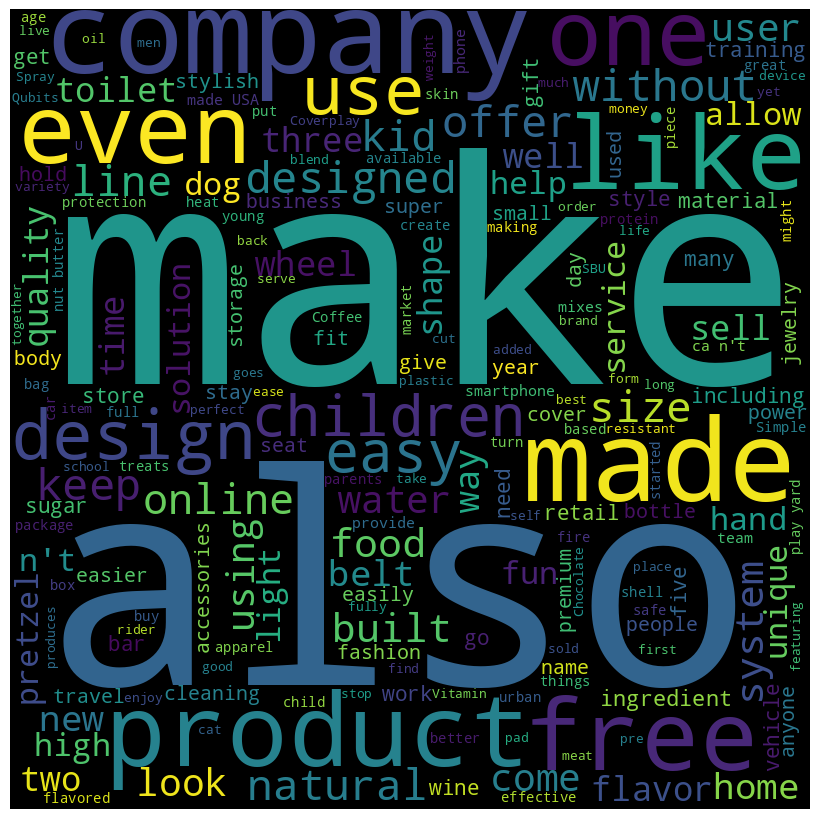

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(comment_words_true)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

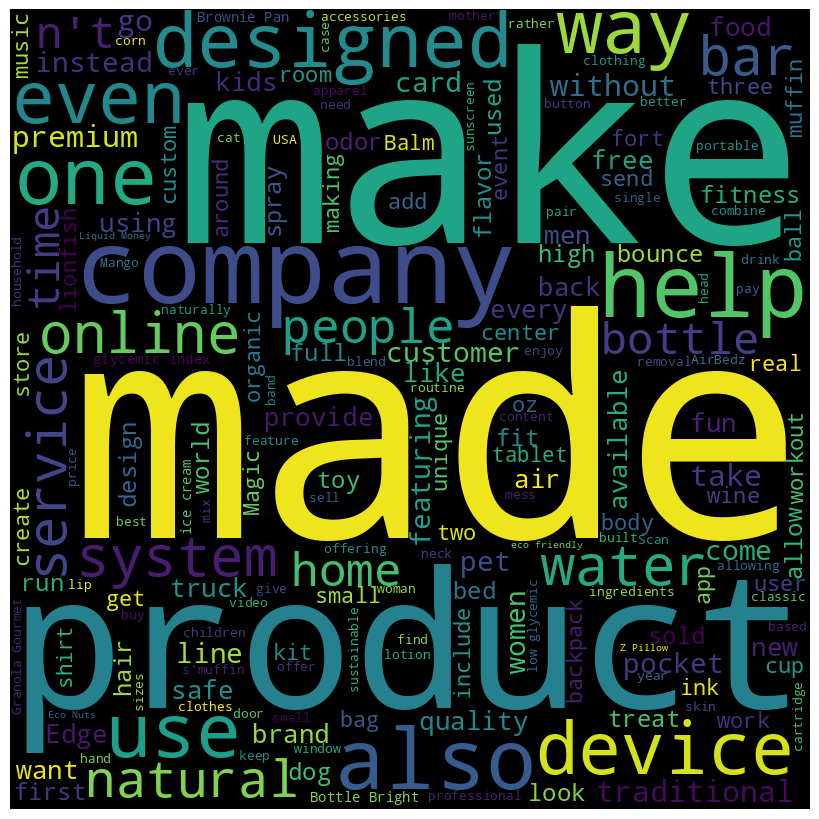

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(comment_words_false)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()